### Importing the libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Loading the dataset

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [9]:
print("The size of training dataset is", train_df.shape)
print("The size of testing dataset is ", train_df.shape)

The size of training dataset is (891, 12)
The size of testing dataset is  (891, 12)


In [10]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
Y_train = train_df['Survived']
Y_test_PassengerId = test_df['PassengerId'] # Save for submission

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_df = train_df[features] 
test_df = test_df[features] 

In [4]:
combined = [train_df, test_df] 

for df in combined:     
    # Filling missing values. 
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Fare'].fillna(df['Fare'].mean(),inplace=True)
    df['Embarked'].fillna(value='S',inplace=True)    
    
    # Converting categorical features to numeric
    df['Sex'] = df['Sex'].replace(['female','male'],[0,1]).astype(int)
    df['Embarked'] = df['Embarked'].replace(['S','Q','C'],[1,2,3]).astype(int)
    
    
    # Another way to convert categorical features to numeric
    #df['Sex'] = df['Sex'].map({'male': 0, 'female': 1 }).astype(int)    
    #df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)     
      
    # Perform normalization
    df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
    df.loc[(df['Fare'] > 31) & (df['Fare'] <= 99), 'Fare']   = 3
    df.loc[(df['Fare'] > 99) & (df['Fare'] <= 250), 'Fare']   = 4
    df.loc[ df['Fare'] > 250, 'Fare'] = 5
    df['Fare'] = df['Fare'].astype(int)

    
# Make sure that train data does not contain NaN
assert not train_df.isnull().values.any()


# Make sure that test data does not contain NaN
assert not test_df.isnull().values.any()

In [5]:
train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,0,1
1,1,0,38.0,1,0,3,3
2,3,0,26.0,0,0,1,1
3,1,0,35.0,1,0,3,1
4,3,1,35.0,0,0,1,1


In [6]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,0,2
1,3,0,47.0,1,0,0,1
2,2,1,62.0,0,0,1,2
3,3,1,27.0,0,0,1,1
4,3,0,22.0,1,1,1,1


### Defining Sigmoid function

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def initialize_with_zeros(dim):

    w = np.zeros(shape=(dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    

### Defining the cost and gradint functions

In [10]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)                                                   # compute activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))          # compute cost
        
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1 / m) * np.dot(X,(A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

"""
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return :
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b    
    
"""

In [13]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        grads, cost = propagate(w, b, X, Y)
                
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        w = w - learning_rate * dw 
        b = b - learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        
       
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


In [15]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture   
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction[0, i] = 1 if A[0, i] >= 0.5 else 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

### Defining the models

In [17]:
def model(X_train, Y_train, X_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_train = predict(w, b, X_train)    
    Y_prediction_test = predict(w, b, X_test)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    
    
    
    d = {"costs": costs,         
         "Y_prediction_train" : Y_prediction_train, 
         "Y_prediction_test": Y_prediction_test,
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [18]:
X_train = np.array(train_df).T
Y_train = np.array(Y_train)
Y_train = Y_train.reshape(Y_train.shape[0], 1).T
X_test = np.array(test_df).T

assert X_train.shape[1] == Y_train.shape[1]
assert X_train.shape[0] == X_test.shape[0]
X_train.shape, Y_train.shape, X_test.shape

((7, 891), (1, 891), (7, 418))

### Training the model 

In [19]:
d = model(X_train, Y_train, X_test, num_iterations = 50000, learning_rate = 0.0001, print_cost = True)

train accuracy: 72.39057239057239 %


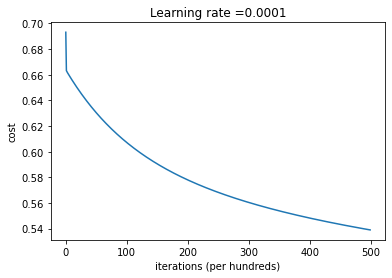

In [20]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [21]:
submission = pd.DataFrame({
        "PassengerId": Y_test_PassengerId,
        "Survived": d['Y_prediction_test'].T.flatten().astype(int)
    })
submission.to_csv('submission.csv', index=False)

###  Final thoughts:
* There is a lot that could be done to improve the score, like feature extraction, normalization, regularization, hyperparameter tuning, etc.

* Tuned scikit-learn algorithms like Random Forest or Decision Tree would perform slightly better, and some would be able to reach above 80%.

* For me the main goal was to implement Logistic Regression from scratch, and make it work!